In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Анализ данных

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


Посмотрим какие типы данных представлены:

In [4]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

Проверим наличие пропущенных значений:

In [5]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Тип колонки "TotalSpent" - object, но значения данного признака должны быть числами. Это из-за строчек, заполненных пробелами. Найдем их число:

In [6]:
data.isin([' ']).sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Можно заметить, что все эти строчки имеют значение ClientPeriod, равное нулю.

In [7]:
data[data['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Найдем все строчки со значением ClientPeriod = 0. Индексы совпадают. Таким образом, можно заменить пропуски на 0.

In [8]:
data[data['ClientPeriod'] == 0]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [19]:
data.iloc[data[data['TotalSpent'] == ' '].index.values,2] = 0

In [20]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

In [21]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                  float64
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

Изменим тип колонок с двумя значениями на bool.

In [22]:
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].astype('bool')

In [23]:
for i in ['HasPartner', 'HasChild', 'HasPhoneService', 'IsBillingPaperless']:
    data[i] = data[i].str.replace('Yes', '1')
    data[i] = data[i].str.replace('No', '0')
    data[i] = data[i].astype('int').astype('bool')

In [24]:
data['Sex'] = data['Sex'].str.replace('Male', '1')
data['Sex'] = data['Sex'].str.replace('Female', '0')
data['Sex'] = data['Sex'].astype('int').astype('bool')

In [25]:
num_indices = np.array([0, 1, 2])
cat_indices = np.arange(3, len(data.columns) - 1)

In [26]:
feature_cols = list(data.columns[num_indices]) + list(data.columns[cat_indices])
target_col = 'Churn'

Посмотрим на распределение числовых признаков:

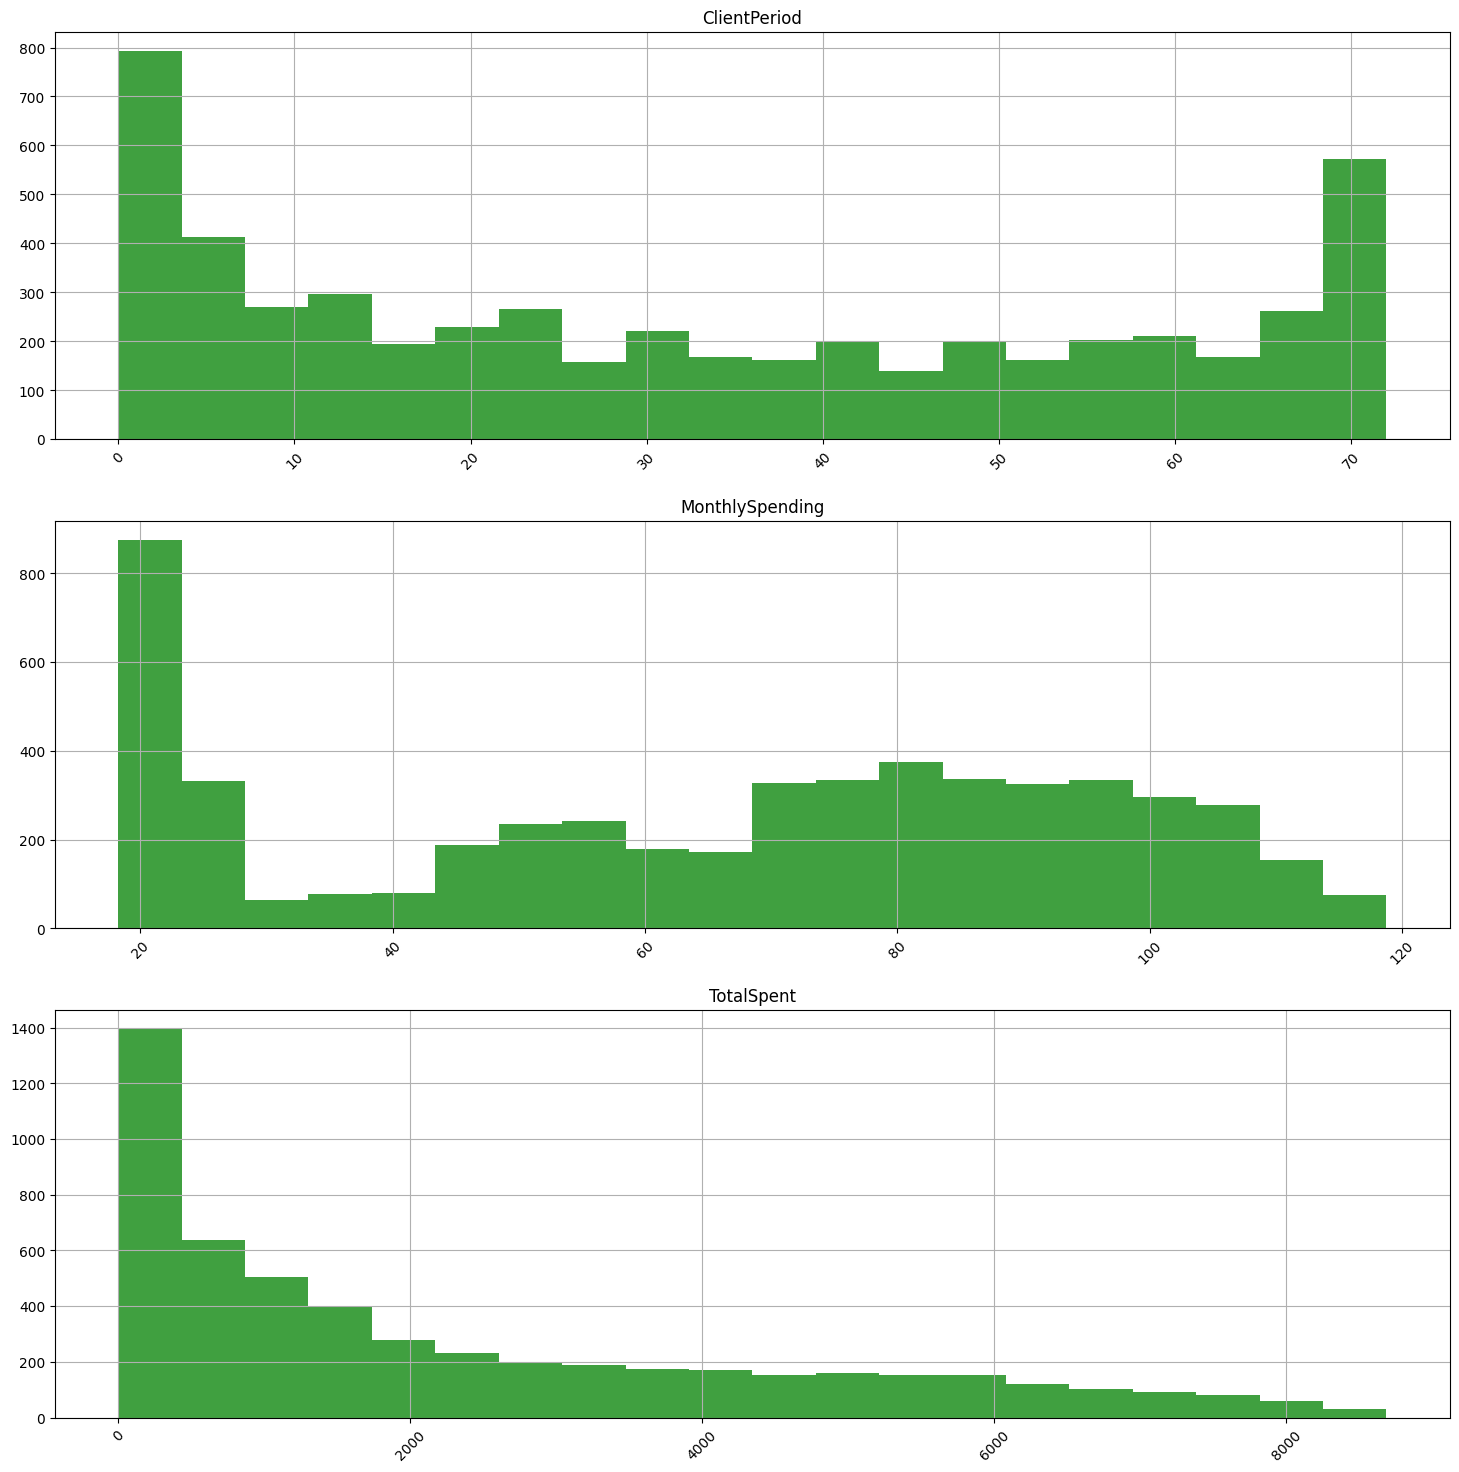

In [27]:
fig, ax = plt.subplots(3, 1, figsize=(18,18))
for i in num_indices:
    ax[i].set_title(data.columns[i])
    ax[i].hist(data.iloc[:,i], bins=20, facecolor='g', alpha=0.75)
    ax[i].grid(True)
    ax[i].tick_params(axis='x', labelsize=10, labelrotation=45)

Посмотрим, сколько различных значений для каждого признака:

In [29]:
for i in feature_cols:
    print(data[i].value_counts(), end='\n\n')

ClientPeriod
1     457
72    284
2     165
3     162
4     136
     ... 
57     39
39     35
44     34
36     34
0       9
Name: count, Length: 73, dtype: int64

MonthlySpending
20.05    46
19.65    35
19.95    34
20.00    33
19.70    32
         ..
87.30     1
68.90     1
67.20     1
86.30     1
98.20     1
Name: count, Length: 1468, dtype: int64

TotalSpent
0.00       9
20.20      9
19.75      8
20.05      6
19.65      6
          ..
41.85      1
4326.25    1
950.20     1
4264.00    1
1375.60    1
Name: count, Length: 4978, dtype: int64

Sex
True     2655
False    2627
Name: count, dtype: int64

IsSeniorCitizen
False    4440
True      842
Name: count, dtype: int64

HasPartner
False    2705
True     2577
Name: count, dtype: int64

HasChild
False    3676
True     1606
Name: count, dtype: int64

HasPhoneService
True     4761
False     521
Name: count, dtype: int64

HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: count, dtype: int6

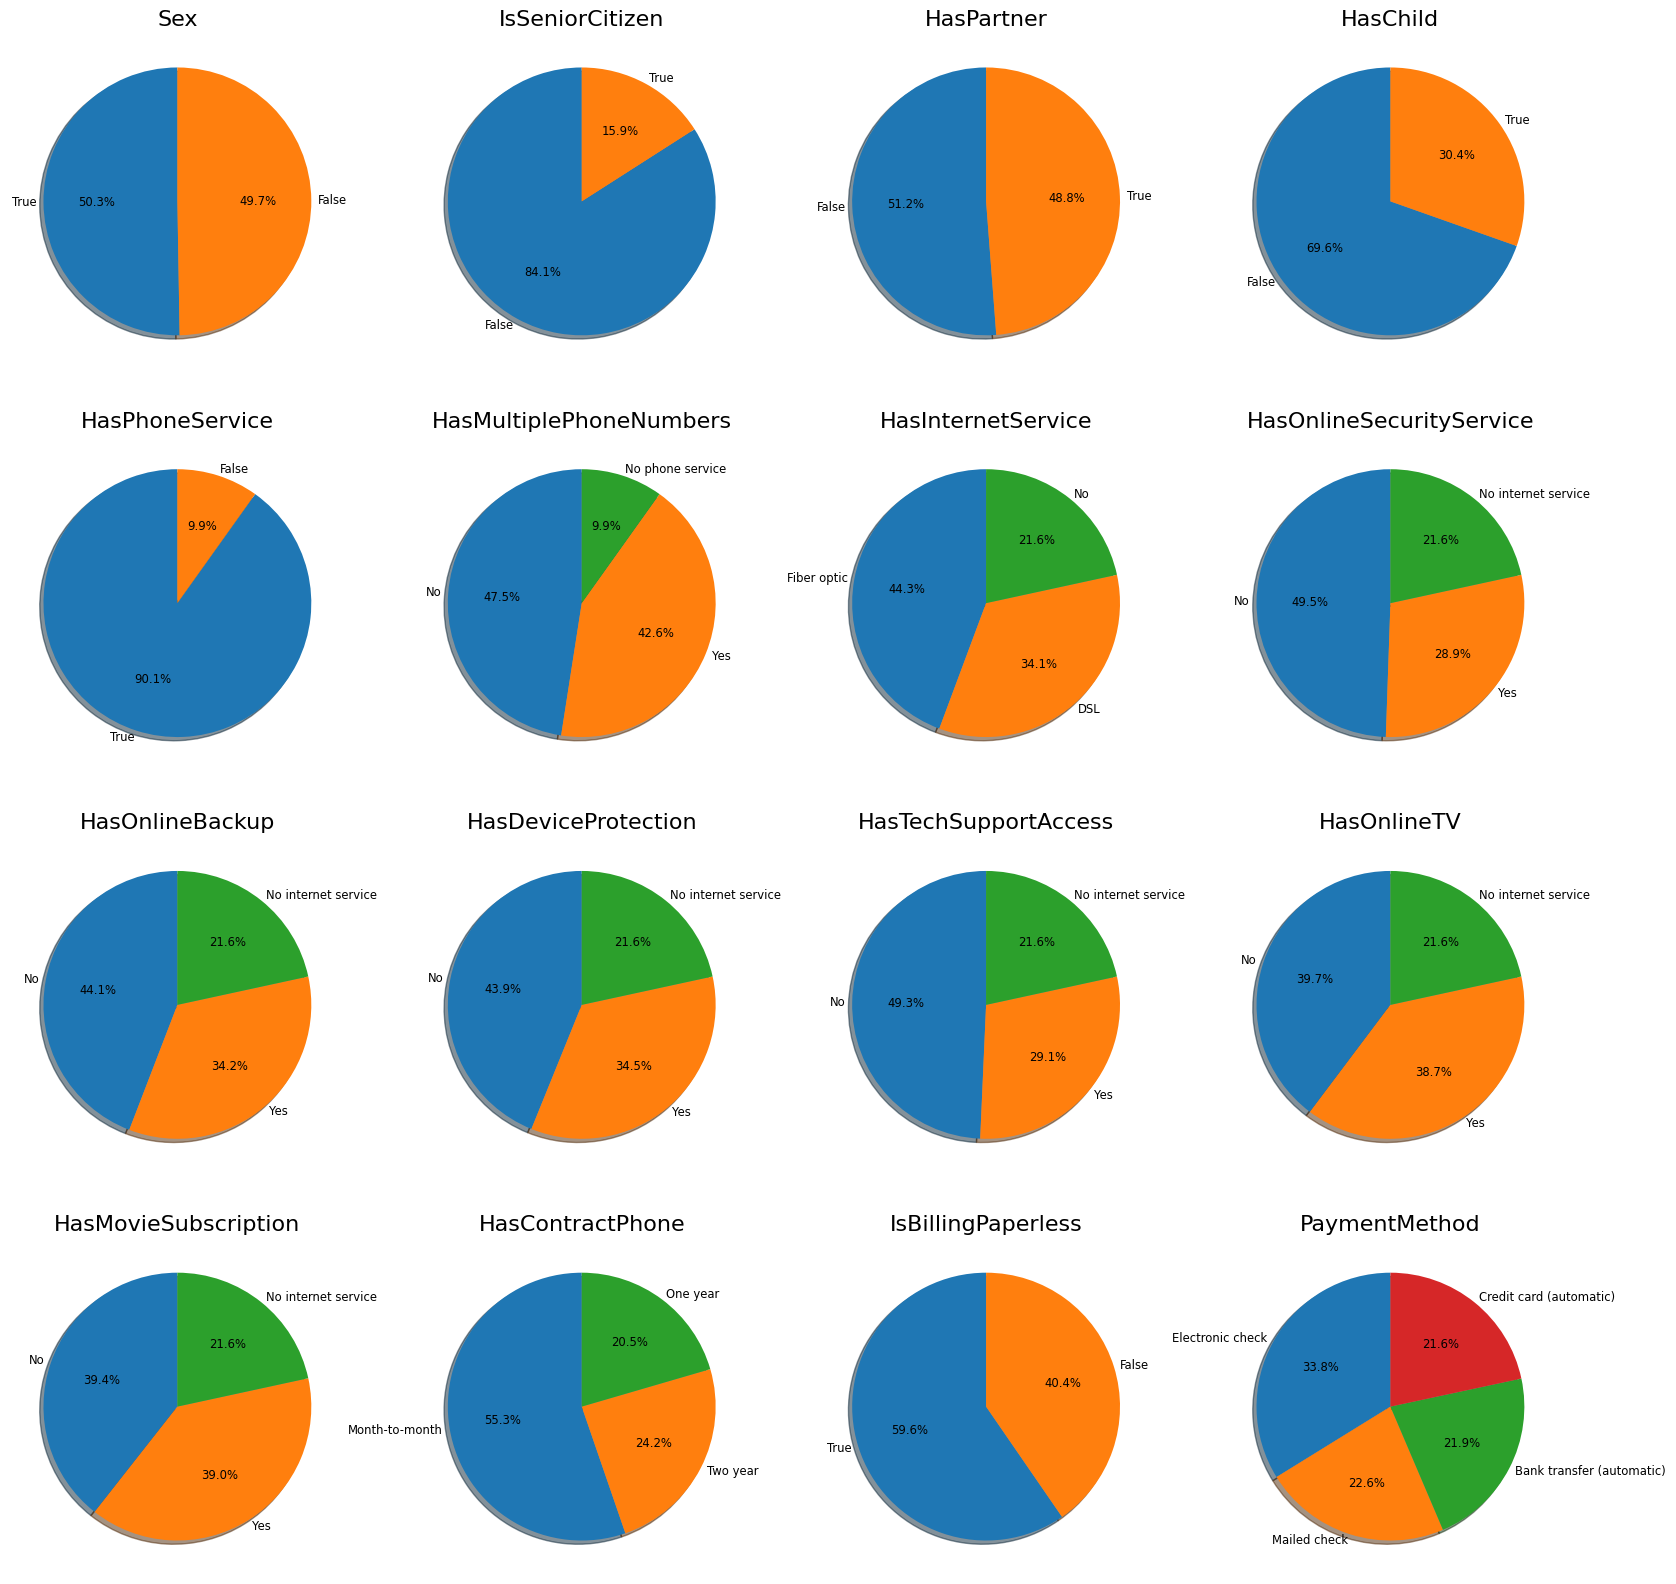

In [32]:
fig, ax = plt.subplots(4, 4, figsize=(20,20))
for i in cat_indices:
    x = data.iloc[:,i].value_counts()
    ax[(i - 3) // 4, (i - 3) % 4].set_title(data.columns[i], {'weight': 'normal','size': 16})
    ax[(i - 3) // 4, (i - 3) % 4].pie(x.values, labels=x.index.values, labeldistance=1.05,
                                      autopct='%1.1f%%', textprops=dict(size="smaller"), startangle=90, shadow=True)

Распределение целевой переменной:

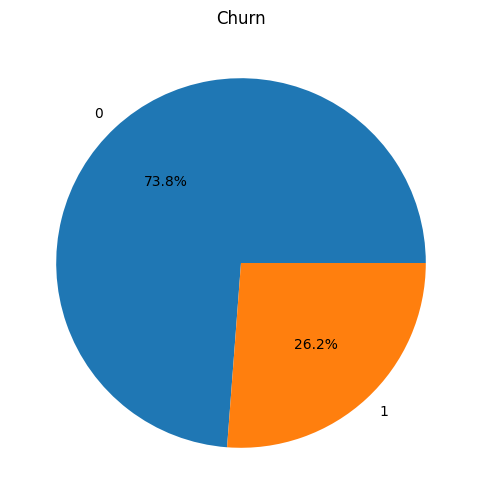

In [33]:
plt.figure(figsize=(6, 6))
plt.title(data.columns[-1])
x = data.iloc[:,-1].value_counts()
plt.pie(x.values, labels=x.index.values, autopct='%1.1f%%')
plt.show()

Проверим, есть ли сильно коррелирующие признаки. TotalSpent и ClientPeriod имеют достаточно высокую корреляцию.

In [34]:
data.corr(numeric_only=True)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,IsBillingPaperless,Churn
ClientPeriod,1.000000,0.249414,0.826658,0.006370,0.011561,0.370314,0.146120,0.013291,0.008711,-0.350640
MonthlySpending,0.249414,1.000000,0.652014,-0.011778,0.215456,0.087652,-0.125682,0.251283,0.344868,0.184769
TotalSpent,0.826658,0.652014,1.000000,0.006341,0.094640,0.308733,0.047241,0.116437,0.157007,-0.200033
Sex,0.006370,-0.011778,0.006341,1.000000,0.013207,0.002780,0.014605,-0.007771,-0.015698,-0.008325
IsSeniorCitizen,0.011561,0.215456,0.094640,0.013207,1.000000,0.016764,-0.217007,0.008763,0.151964,0.156872
HasPartner,0.370314,0.087652,0.308733,0.002780,0.016764,1.000000,0.442530,0.001508,-0.005293,-0.148347
HasChild,0.146120,-0.125682,0.047241,0.014605,-0.217007,0.442530,1.000000,-0.010475,-0.100777,-0.163609
HasPhoneService,0.013291,0.251283,0.116437,-0.007771,0.008763,0.001508,-0.010475,1.000000,0.021362,0.010849
IsBillingPaperless,0.008711,0.344868,0.157007,-0.015698,0.151964,-0.005293,-0.100777,0.021362,1.000000,0.194040
Churn,-0.350640,0.184769,-0.200033,-0.008325,0.156872,-0.148347,-0.163609,0.010849,0.194040,1.000000


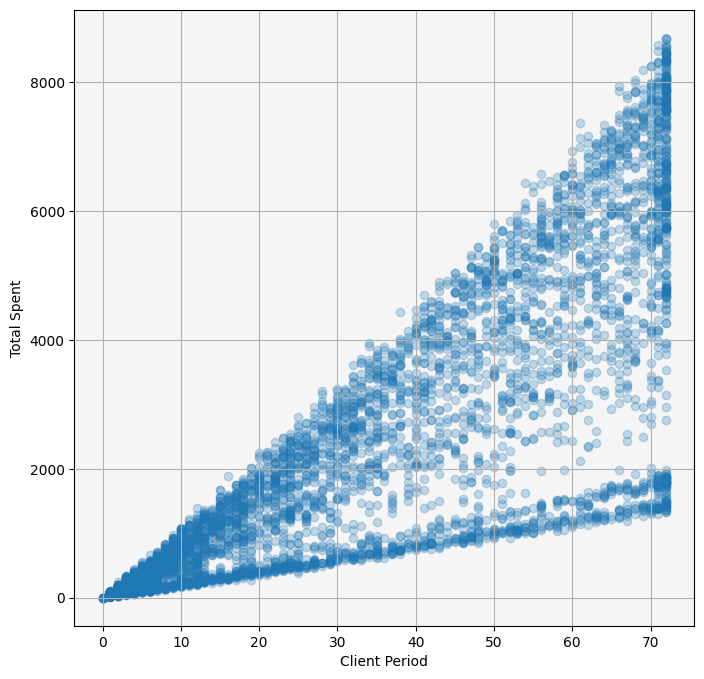

In [44]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("whitesmoke")
plt.scatter(y=data['TotalSpent'], x=data['ClientPeriod'], alpha=0.25)
plt.xlabel('Client Period')
plt.ylabel('Total Spent')
plt.grid(True)

# Логистическая регрессия

Закодируем категориальные признаки с помощью One-hot-encoding.

In [45]:
dummy_features = pd.get_dummies(data[['HasMultiplePhoneNumbers', 'HasInternetService',
                                                  'HasOnlineSecurityService', 'HasOnlineBackup',
                                                  'HasDeviceProtection', 'HasTechSupportAccess',
                                                  'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'PaymentMethod']])

In [46]:
X = pd.concat([data[data.columns[num_indices]], dummy_features,
              data[['HasPartner', 'HasChild', 'HasPhoneService', 'IsBillingPaperless', 'Sex']]], axis=1)

In [47]:
y = data['Churn']

In [48]:
from sklearn import preprocessing
from sklearn import model_selection

In [49]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, test_size=0.2, random_state=42)

Стандартизация числовых признаков:

In [50]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train[X_train.columns[num_indices]])
X_train[X_train.columns[num_indices]] = scaler.transform(X_train[X_train.columns[num_indices]])
X_test[X_test.columns[num_indices]] = scaler.transform(X_test[X_test.columns[num_indices]])

In [51]:
from sklearn.linear_model import LogisticRegression

Найдем лучшую модель с помощью GridSearchCV:

In [52]:
params = {'C': [500, 100, 10, 1, 0.1, 0.01, 0.001]}
clf = model_selection.GridSearchCV(LogisticRegression(penalty='l2'), params, cv=5, scoring='roc_auc')

In [54]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [500, 100, 10, 1, 0.1, 0.01, 0.001]},
             scoring='roc_auc')

In [55]:
clf.best_params_

{'C': 10}

In [56]:
best_clf = clf.best_estimator_
y_pred = best_clf.predict_proba(X_test)[:, 1]

Проверка качества модели:

In [57]:
from sklearn.metrics import roc_auc_score, roc_curve

In [58]:
roc_auc_score(y_test, y_pred)

0.8270102788116106

# Градиентный бустинг

In [59]:
import catboost

In [88]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data.drop(['Churn'], axis=1), data['Churn'],
                                                       train_size=0.8,
                                                       random_state=42)

In [89]:
X_train.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                  float64
Sex                            bool
IsSeniorCitizen                bool
HasPartner                     bool
HasChild                       bool
HasPhoneService                bool
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless             bool
PaymentMethod                object
dtype: object

Применим модель градиентного бустинга CatBoostClassifier с параметрами по умолчанию:

In [90]:
boosting = catboost.CatBoostClassifier(cat_features=cat_indices)
boosting.fit(X_train, y_train)

Learning rate set to 0.019062
0:	learn: 0.6798227	total: 19.3ms	remaining: 19.2s
1:	learn: 0.6678084	total: 37.6ms	remaining: 18.8s
2:	learn: 0.6553003	total: 58.3ms	remaining: 19.4s
3:	learn: 0.6435910	total: 78.3ms	remaining: 19.5s
4:	learn: 0.6326850	total: 99.8ms	remaining: 19.9s
5:	learn: 0.6225823	total: 121ms	remaining: 20.1s
6:	learn: 0.6128742	total: 141ms	remaining: 20s
7:	learn: 0.6048572	total: 153ms	remaining: 18.9s
8:	learn: 0.5958847	total: 173ms	remaining: 19s
9:	learn: 0.5871696	total: 194ms	remaining: 19.2s
10:	learn: 0.5792007	total: 220ms	remaining: 19.8s
11:	learn: 0.5713099	total: 242ms	remaining: 19.9s
12:	learn: 0.5643834	total: 259ms	remaining: 19.7s
13:	learn: 0.5569418	total: 281ms	remaining: 19.8s
14:	learn: 0.5502712	total: 303ms	remaining: 19.9s
15:	learn: 0.5441586	total: 324ms	remaining: 19.9s
16:	learn: 0.5381109	total: 349ms	remaining: 20.2s
17:	learn: 0.5324322	total: 371ms	remaining: 20.2s
18:	learn: 0.5268003	total: 392ms	remaining: 20.2s
19:	learn:

170:	learn: 0.3879833	total: 3.69s	remaining: 17.9s
171:	learn: 0.3878007	total: 3.71s	remaining: 17.9s
172:	learn: 0.3878002	total: 3.72s	remaining: 17.8s
173:	learn: 0.3876802	total: 3.74s	remaining: 17.8s
174:	learn: 0.3876706	total: 3.76s	remaining: 17.7s
175:	learn: 0.3874036	total: 3.78s	remaining: 17.7s
176:	learn: 0.3873755	total: 3.79s	remaining: 17.6s
177:	learn: 0.3873591	total: 3.81s	remaining: 17.6s
178:	learn: 0.3873043	total: 3.83s	remaining: 17.6s
179:	learn: 0.3871391	total: 3.85s	remaining: 17.6s
180:	learn: 0.3869335	total: 3.88s	remaining: 17.5s
181:	learn: 0.3866917	total: 3.9s	remaining: 17.5s
182:	learn: 0.3864635	total: 3.92s	remaining: 17.5s
183:	learn: 0.3862606	total: 3.95s	remaining: 17.5s
184:	learn: 0.3862287	total: 3.96s	remaining: 17.4s
185:	learn: 0.3861306	total: 3.98s	remaining: 17.4s
186:	learn: 0.3858783	total: 4s	remaining: 17.4s
187:	learn: 0.3858598	total: 4.02s	remaining: 17.4s
188:	learn: 0.3857404	total: 4.04s	remaining: 17.3s
189:	learn: 0.38

335:	learn: 0.3727191	total: 6.97s	remaining: 13.8s
336:	learn: 0.3725564	total: 7s	remaining: 13.8s
337:	learn: 0.3725012	total: 7.02s	remaining: 13.8s
338:	learn: 0.3723967	total: 7.04s	remaining: 13.7s
339:	learn: 0.3723952	total: 7.05s	remaining: 13.7s
340:	learn: 0.3723505	total: 7.08s	remaining: 13.7s
341:	learn: 0.3721993	total: 7.1s	remaining: 13.7s
342:	learn: 0.3721464	total: 7.12s	remaining: 13.6s
343:	learn: 0.3720769	total: 7.14s	remaining: 13.6s
344:	learn: 0.3720496	total: 7.16s	remaining: 13.6s
345:	learn: 0.3719755	total: 7.18s	remaining: 13.6s
346:	learn: 0.3719437	total: 7.21s	remaining: 13.6s
347:	learn: 0.3718225	total: 7.23s	remaining: 13.6s
348:	learn: 0.3718059	total: 7.25s	remaining: 13.5s
349:	learn: 0.3717976	total: 7.26s	remaining: 13.5s
350:	learn: 0.3717123	total: 7.28s	remaining: 13.5s
351:	learn: 0.3716542	total: 7.3s	remaining: 13.4s
352:	learn: 0.3715574	total: 7.32s	remaining: 13.4s
353:	learn: 0.3715236	total: 7.35s	remaining: 13.4s
354:	learn: 0.371

502:	learn: 0.3565992	total: 10.5s	remaining: 10.4s
503:	learn: 0.3565116	total: 10.5s	remaining: 10.4s
504:	learn: 0.3563565	total: 10.6s	remaining: 10.4s
505:	learn: 0.3563492	total: 10.6s	remaining: 10.3s
506:	learn: 0.3562508	total: 10.6s	remaining: 10.3s
507:	learn: 0.3561802	total: 10.6s	remaining: 10.3s
508:	learn: 0.3561754	total: 10.6s	remaining: 10.3s
509:	learn: 0.3560655	total: 10.7s	remaining: 10.2s
510:	learn: 0.3560227	total: 10.7s	remaining: 10.2s
511:	learn: 0.3558538	total: 10.7s	remaining: 10.2s
512:	learn: 0.3556728	total: 10.7s	remaining: 10.2s
513:	learn: 0.3555847	total: 10.8s	remaining: 10.2s
514:	learn: 0.3555137	total: 10.8s	remaining: 10.1s
515:	learn: 0.3553841	total: 10.8s	remaining: 10.1s
516:	learn: 0.3551884	total: 10.8s	remaining: 10.1s
517:	learn: 0.3550160	total: 10.8s	remaining: 10.1s
518:	learn: 0.3548483	total: 10.9s	remaining: 10.1s
519:	learn: 0.3546139	total: 10.9s	remaining: 10s
520:	learn: 0.3545691	total: 10.9s	remaining: 10s
521:	learn: 0.35

669:	learn: 0.3393422	total: 14.3s	remaining: 7.04s
670:	learn: 0.3391934	total: 14.3s	remaining: 7.02s
671:	learn: 0.3390958	total: 14.3s	remaining: 7s
672:	learn: 0.3390083	total: 14.4s	remaining: 6.98s
673:	learn: 0.3389149	total: 14.4s	remaining: 6.96s
674:	learn: 0.3389071	total: 14.4s	remaining: 6.93s
675:	learn: 0.3388379	total: 14.4s	remaining: 6.91s
676:	learn: 0.3386786	total: 14.4s	remaining: 6.89s
677:	learn: 0.3386043	total: 14.5s	remaining: 6.87s
678:	learn: 0.3384877	total: 14.5s	remaining: 6.85s
679:	learn: 0.3384627	total: 14.5s	remaining: 6.83s
680:	learn: 0.3383855	total: 14.5s	remaining: 6.81s
681:	learn: 0.3383603	total: 14.6s	remaining: 6.79s
682:	learn: 0.3383162	total: 14.6s	remaining: 6.77s
683:	learn: 0.3382011	total: 14.6s	remaining: 6.75s
684:	learn: 0.3381200	total: 14.6s	remaining: 6.73s
685:	learn: 0.3380749	total: 14.7s	remaining: 6.71s
686:	learn: 0.3380514	total: 14.7s	remaining: 6.69s
687:	learn: 0.3378637	total: 14.7s	remaining: 6.67s
688:	learn: 0.3

836:	learn: 0.3258507	total: 18.1s	remaining: 3.53s
837:	learn: 0.3257711	total: 18.1s	remaining: 3.51s
838:	learn: 0.3257329	total: 18.2s	remaining: 3.48s
839:	learn: 0.3256526	total: 18.2s	remaining: 3.46s
840:	learn: 0.3255744	total: 18.2s	remaining: 3.44s
841:	learn: 0.3254845	total: 18.2s	remaining: 3.42s
842:	learn: 0.3253269	total: 18.3s	remaining: 3.4s
843:	learn: 0.3252172	total: 18.3s	remaining: 3.38s
844:	learn: 0.3252067	total: 18.3s	remaining: 3.36s
845:	learn: 0.3251341	total: 18.3s	remaining: 3.33s
846:	learn: 0.3249990	total: 18.4s	remaining: 3.31s
847:	learn: 0.3249966	total: 18.4s	remaining: 3.29s
848:	learn: 0.3249232	total: 18.4s	remaining: 3.27s
849:	learn: 0.3248678	total: 18.4s	remaining: 3.25s
850:	learn: 0.3247701	total: 18.4s	remaining: 3.23s
851:	learn: 0.3246437	total: 18.5s	remaining: 3.21s
852:	learn: 0.3245933	total: 18.5s	remaining: 3.19s
853:	learn: 0.3244711	total: 18.5s	remaining: 3.16s
854:	learn: 0.3243701	total: 18.5s	remaining: 3.14s
855:	learn: 0

995:	learn: 0.3131919	total: 22s	remaining: 88.5ms
996:	learn: 0.3131860	total: 22.1s	remaining: 66.4ms
997:	learn: 0.3130678	total: 22.1s	remaining: 44.3ms
998:	learn: 0.3130572	total: 22.1s	remaining: 22.1ms
999:	learn: 0.3129858	total: 22.1s	remaining: 0us


In [91]:
y_train_pred = boosting.predict_proba(X_train)[:,1]

In [92]:
y_test_pred = boosting.predict_proba(X_test)[:,1]

ROC-кривые для обучающей и тестовой выборки:

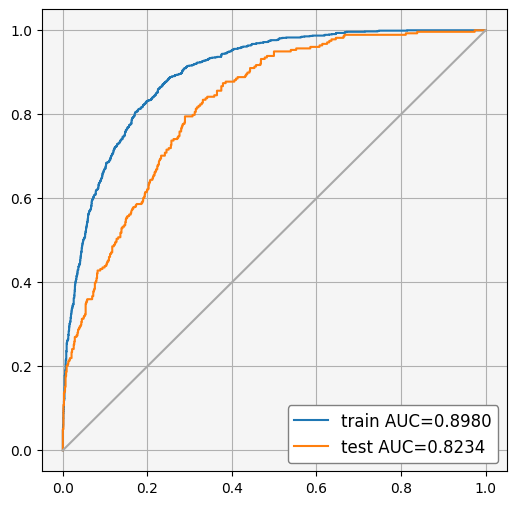

In [93]:
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.set_facecolor("whitesmoke")
plt.plot(*roc_curve(y_train, y_train_pred)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_pred)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("gray")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), color='darkgray')
plt.grid(True)
plt.show()

In [94]:
grid_boosting = catboost.CatBoostClassifier(cat_features=[8, 9, 10, 11, 12, 13, 14, 15, 16, 18],
                                            eval_metric='AUC', 
                                            silent=True)
grid_model = grid_boosting.grid_search({'l2_leaf_reg': np.array([0.01, 0.1]), 'learning_rate': np.array([0.05, 0.075]), 
                           'depth': np.array([2,3]), 'n_estimators': np.array([200, 500, 1000]), 
                           'min_data_in_leaf': np.array([1, 2])},
                           X_train.values,
                           y_train.values, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8382253566
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8382254	best: 0.8382254 (0)	total: 1.65s	remaining: 1m 17s

bestTest = 0.8421181274
bestIteration = 196

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8421181	best: 0.8421181 (1)	total: 3.39s	remaining: 1m 17s

bestTest = 0.8405114159
bestIteration = 181

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8405114	best: 0.8421181 (1)	total: 5.09s	remaining: 1m 16s

bestTest = 0.8417946285
bestIteration = 198

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8417946	best: 0.8421181 (1)	total: 6.77s	remaining: 1m 14s



bestTest = 0.8453387394
bestIteration = 446

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
33:	loss: 0.8453387	best: 0.8453387 (5)	total: 2m 50s	remaining: 1m 10s

bestTest = 0.8435559006
bestIteration = 641

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
34:	loss: 0.8435559	best: 0.8453387 (5)	total: 2m 59s	remaining: 1m 6s

bestTest = 0.8432395905
bestIteration = 388

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
35:	loss: 0.8432396	best: 0.8453387 (5)	total: 3m 7s	remaining: 1m 2s

bestTest = 0.8387753048
bestIteration = 198

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
36:	loss: 0.8387753	best: 0.8453387 (5)	total: 3m 9s	remaining: 56.

In [95]:
best_model = catboost.CatBoostClassifier(cat_features=[8, 9, 10, 11, 12, 13, 14, 15, 16, 18], 
                                         eval_metric='AUC', silent=True, min_data_in_leaf=1,
                                         depth=2, learning_rate=0.075, l2_leaf_reg=0.01, iterations=500)

In [96]:
best_model.fit(X_train, y_train)

In [97]:
y_pred = best_model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

0.8256665527654898

Попробуем обучить модель без колонки TotalSpent:

In [113]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data.drop(['Churn', 'TotalSpent'], axis=1), data['Churn'],
                                                       train_size=0.8,
                                                       random_state=42)

In [99]:
grid_boosting = catboost.CatBoostClassifier(cat_features=[7, 8, 9, 10, 11, 12, 13, 14, 15, 17],
                                            eval_metric='AUC', 
                                            silent=True)
grid_model = grid_boosting.grid_search({'l2_leaf_reg': np.array([0.01, 0.1]), 'learning_rate': np.array([0.05, 0.075]), 
                           'depth': np.array([2,3]), 'n_estimators': np.array([200, 500, 1000]), 
                           'min_data_in_leaf': np.array([1, 2])},
                           X_train.values,
                           y_train.values, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8396882908
bestIteration = 198

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8396883	best: 0.8396883 (0)	total: 1.65s	remaining: 1m 17s

bestTest = 0.8414531573
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8414532	best: 0.8414532 (1)	total: 3.42s	remaining: 1m 18s

bestTest = 0.838685444
bestIteration = 198

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8386854	best: 0.8414532 (1)	total: 4.96s	remaining: 1m 14s

bestTest = 0.8413417299
bestIteration = 175

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8413417	best: 0.8414532 (1)	total: 6.54s	remaining: 1m 11s




bestTest = 0.8435666839
bestIteration = 425

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
33:	loss: 0.8435667	best: 0.8461044 (17)	total: 2m 50s	remaining: 1m 10s

bestTest = 0.8426321314
bestIteration = 669

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
34:	loss: 0.8426321	best: 0.8461044 (17)	total: 2m 58s	remaining: 1m 6s

bestTest = 0.8438146998
bestIteration = 361

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
35:	loss: 0.8438147	best: 0.8461044 (17)	total: 3m 7s	remaining: 1m 2s

bestTest = 0.8397493961
bestIteration = 180

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
36:	loss: 0.8397494	best: 0.8461044 (17)	total: 3m 9s	remaining:

In [106]:
best_model = catboost.CatBoostClassifier(cat_features=[7, 8, 9, 10, 11, 12, 13, 14, 15, 17], 
                                         eval_metric='AUC', silent=True, min_data_in_leaf=1,
                                         depth=3, learning_rate=0.075, l2_leaf_reg=0.01, iterations=500)

In [107]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

0.8264861794774707

Качество вышло немного выше

# Предсказания для окончательной оценки.

In [108]:
X_test = pd.read_csv('test.csv')

In [109]:
for i in ['HasPartner', 'HasChild', 'HasPhoneService', 'IsBillingPaperless']:
    X_test[i] = X_test[i].str.replace('Yes', '1')
    X_test[i] = X_test[i].str.replace('No', '0')
    X_test[i] = X_test[i].astype('int').astype('bool')
X_test['Sex'] = X_test['Sex'].str.replace('Male', '1')
X_test['Sex'] = X_test['Sex'].str.replace('Female', '0')
X_test['Sex'] = X_test['Sex'].astype('int').astype('bool')

In [110]:
submission = pd.read_csv('submission.csv')

submission['Churn'] = best_model.predict_proba(X_test.drop('TotalSpent', axis=1).values)[:, 1]
submission.to_csv('my_submission.csv', index=False)

Качество на Kaggle: 0.85217